# Explore here

In [25]:
!pip install -r "/workspaces/random_forest_project_2/requirements.txt"

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
"""
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
"""

'\n!pip install numpy\n!pip install pandas\n!pip install scikit-learn\n!pip install matplotlib\n!pip install seaborn\n'

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, make_scorer
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from pickle import dump



In [28]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

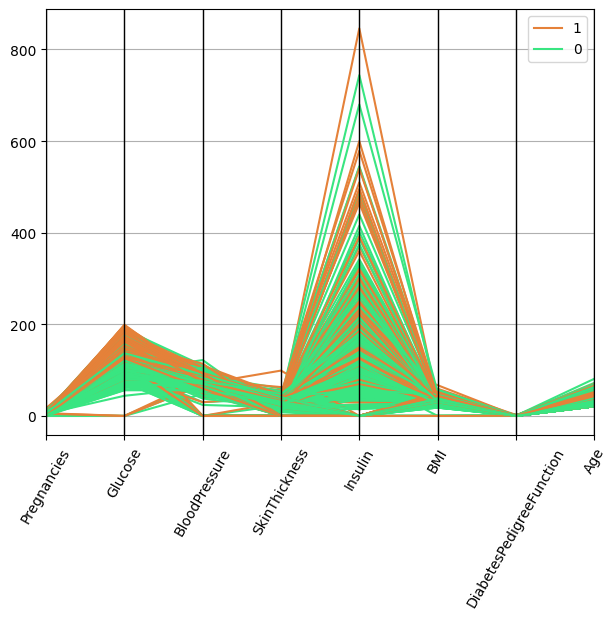

In [30]:
pd.plotting.parallel_coordinates(df, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))
plt.tight_layout()
plt.xticks(rotation=60)

In [31]:
# We divide the dataset into training and test samples
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


Step 2: Initialization and training of the model

In [32]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

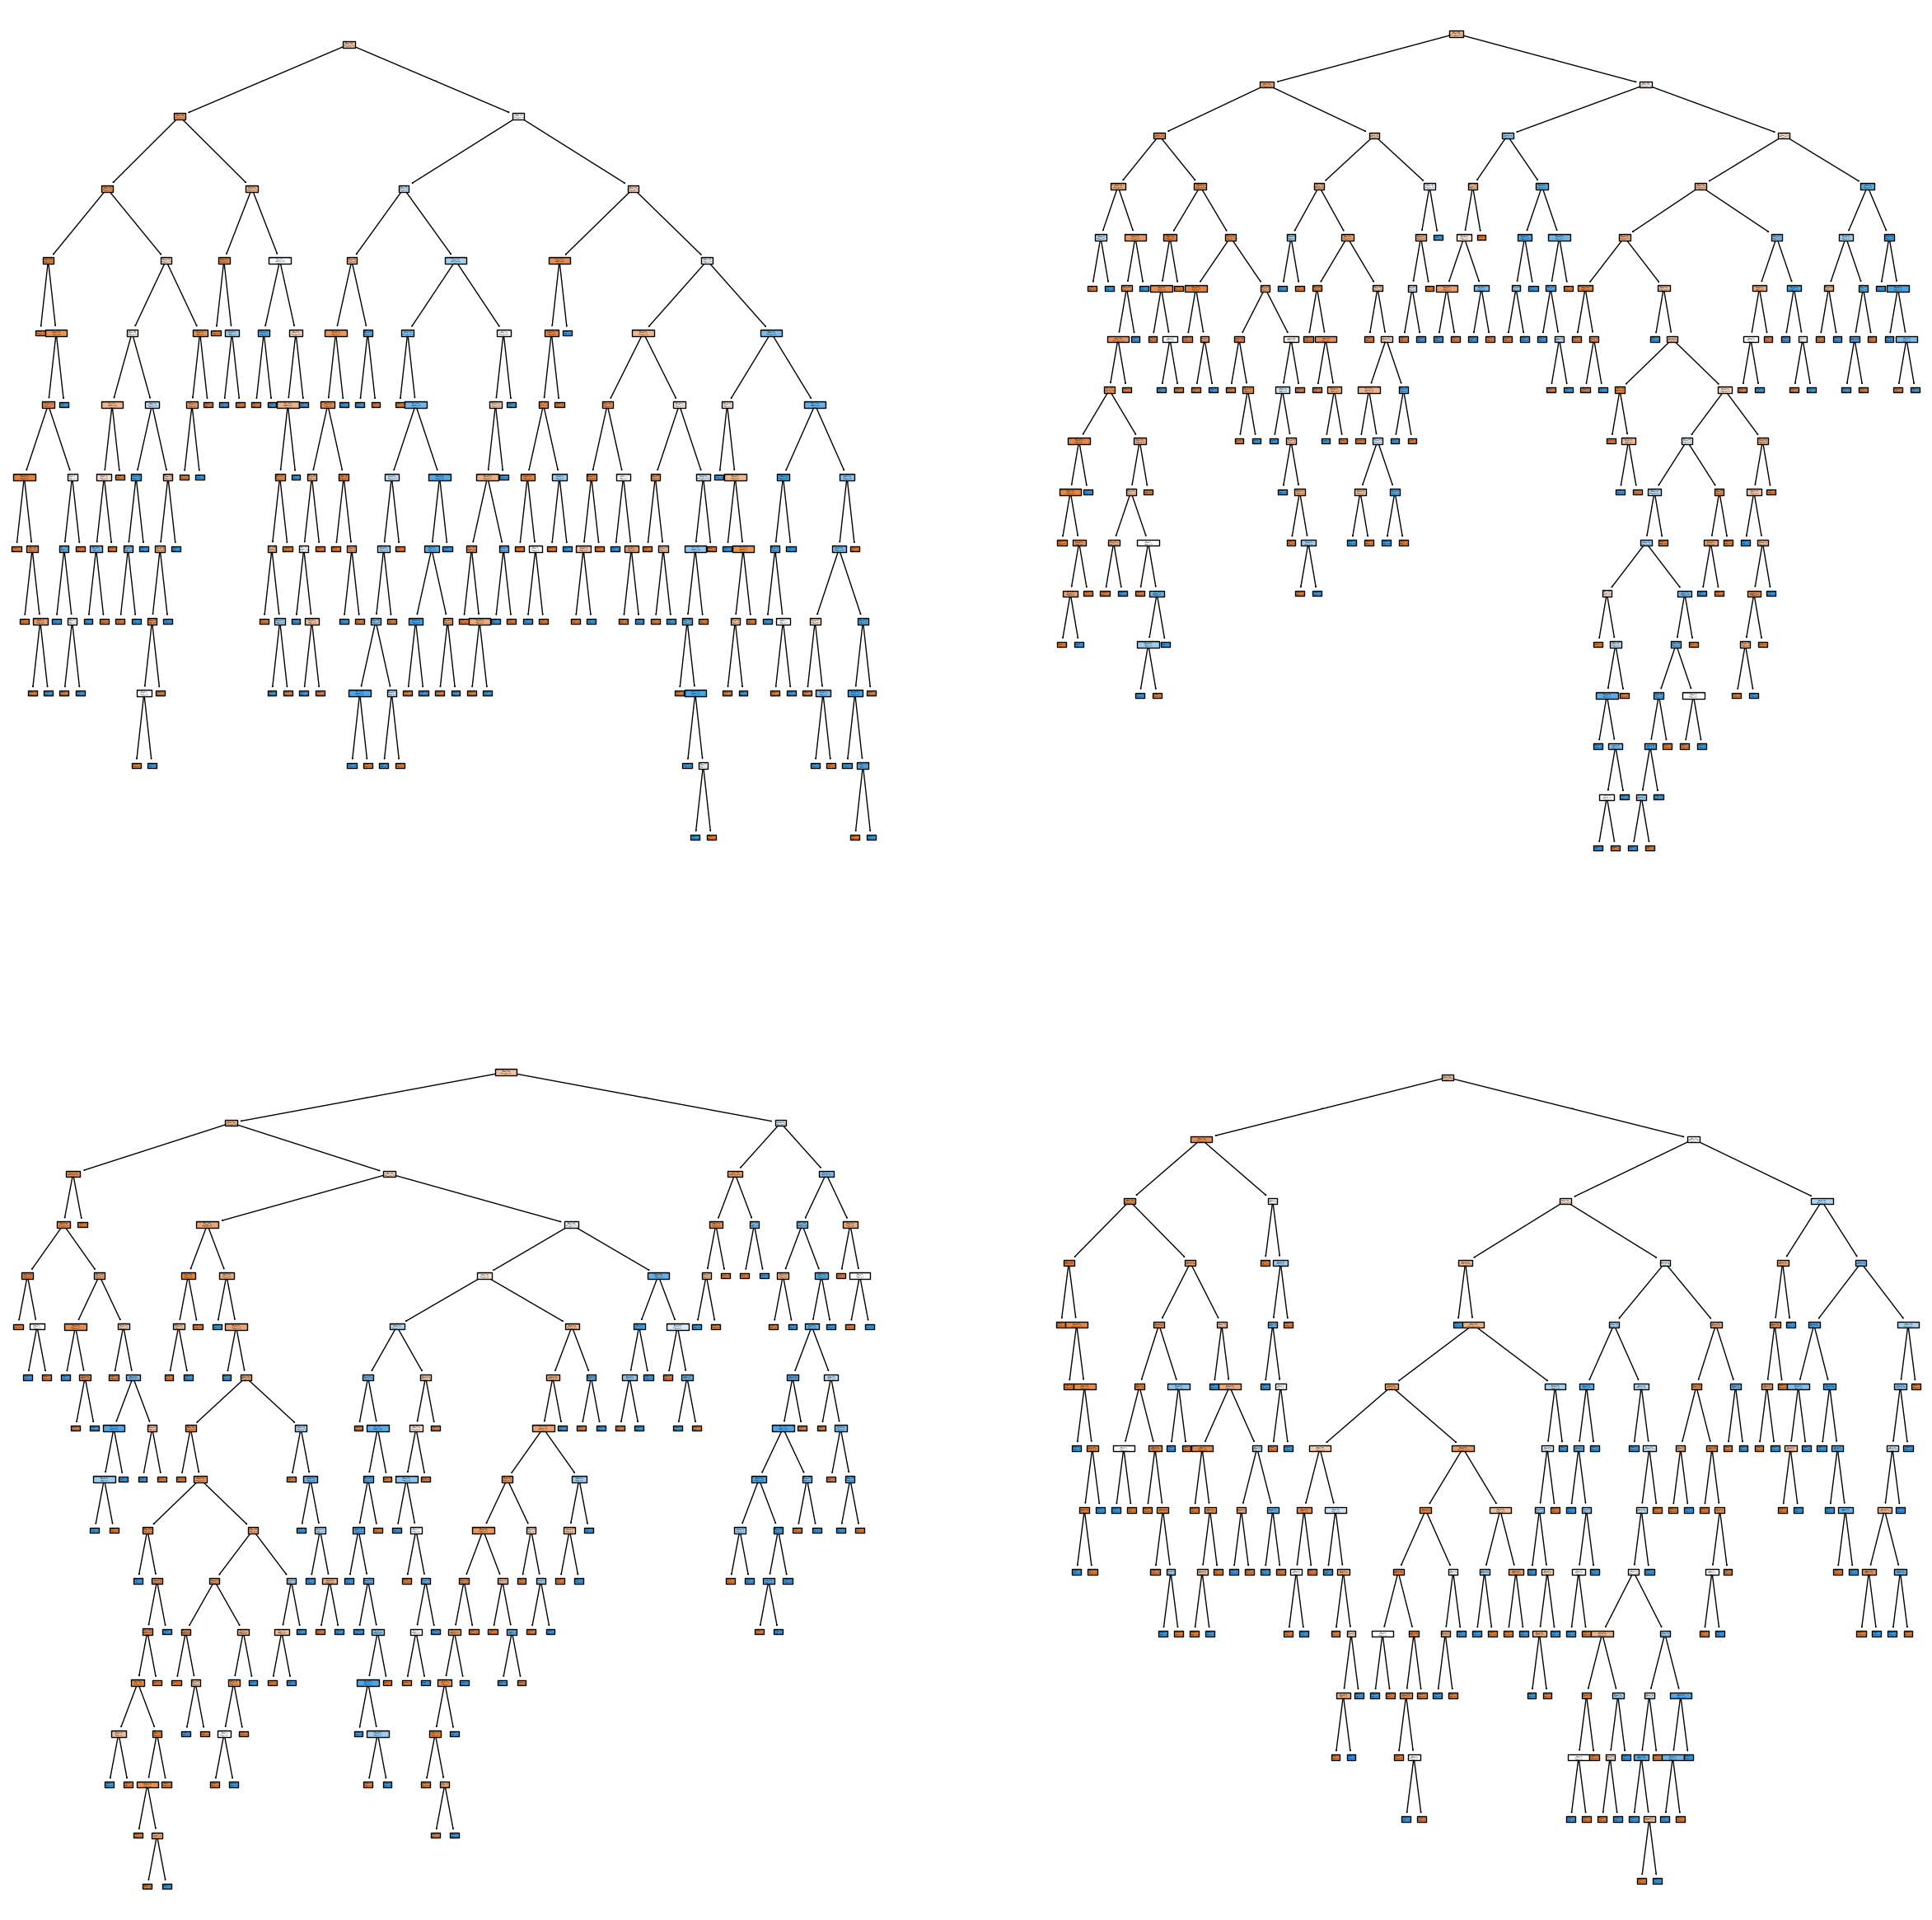

In [33]:
fig, axis = plt.subplots(2, 2, figsize = (30, 30))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [34]:
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [35]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [36]:
accuracy_score(y_train, y_train_pred)

1.0

In [37]:
accuracy_score(y_test, y_pred)

0.7207792207792207

In [38]:
print(f1_score(y_train, y_train_pred))

1.0


In [39]:
print(f1_score(y_test, y_pred))

0.6126126126126126


In [40]:
dump(model, open("random_forest_classifier_default_42.sav", "wb"))


In [41]:
#Random Search HyperParameters
parameters = {
              'n_estimators':[20,50,100,120,150],
              'max_depth':[4,5,6,7],
              'min_samples_leaf':[1,2,3,4,5],
              'min_samples_split':[2,3,4,5],
              'max_features':[3,4,5,6,7,8]
             }
scorer = make_scorer(f1_score)

In [42]:
random = RandomizedSearchCV(model, parameters, scoring=scorer)
random


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [4, 5, 6, 7],
                                        'max_features': [3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [20, 50, 100, 120,
                                                         150]},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [43]:
# Fit the model to your data
random_out = random.fit(X_train, y_train)
random_out

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [4, 5, 6, 7],
                                        'max_features': [3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [20, 50, 100, 120,
                                                         150]},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [44]:
best = random_out.best_estimator_
best

RandomForestClassifier(max_depth=7, max_features=6, min_samples_leaf=4,
                       min_samples_split=3, n_estimators=20, random_state=42)

In [45]:
class_train_pred = best.predict(X_train)
class_test_pred = best.predict(X_test)

In [46]:

print('The Training F1 Score is', f1_score(class_train_pred, y_train))
print('The Testing F1 Score is', f1_score(class_test_pred, y_test))

The Training F1 Score is 0.8395061728395061
The Testing F1 Score is 0.7017543859649122


In [47]:

print('The Accuracy Score is', accuracy_score(class_train_pred, y_train))
print('The Accuracy Score is', accuracy_score(class_test_pred, y_test))

The Accuracy Score is 0.8941368078175895
The Accuracy Score is 0.7792207792207793


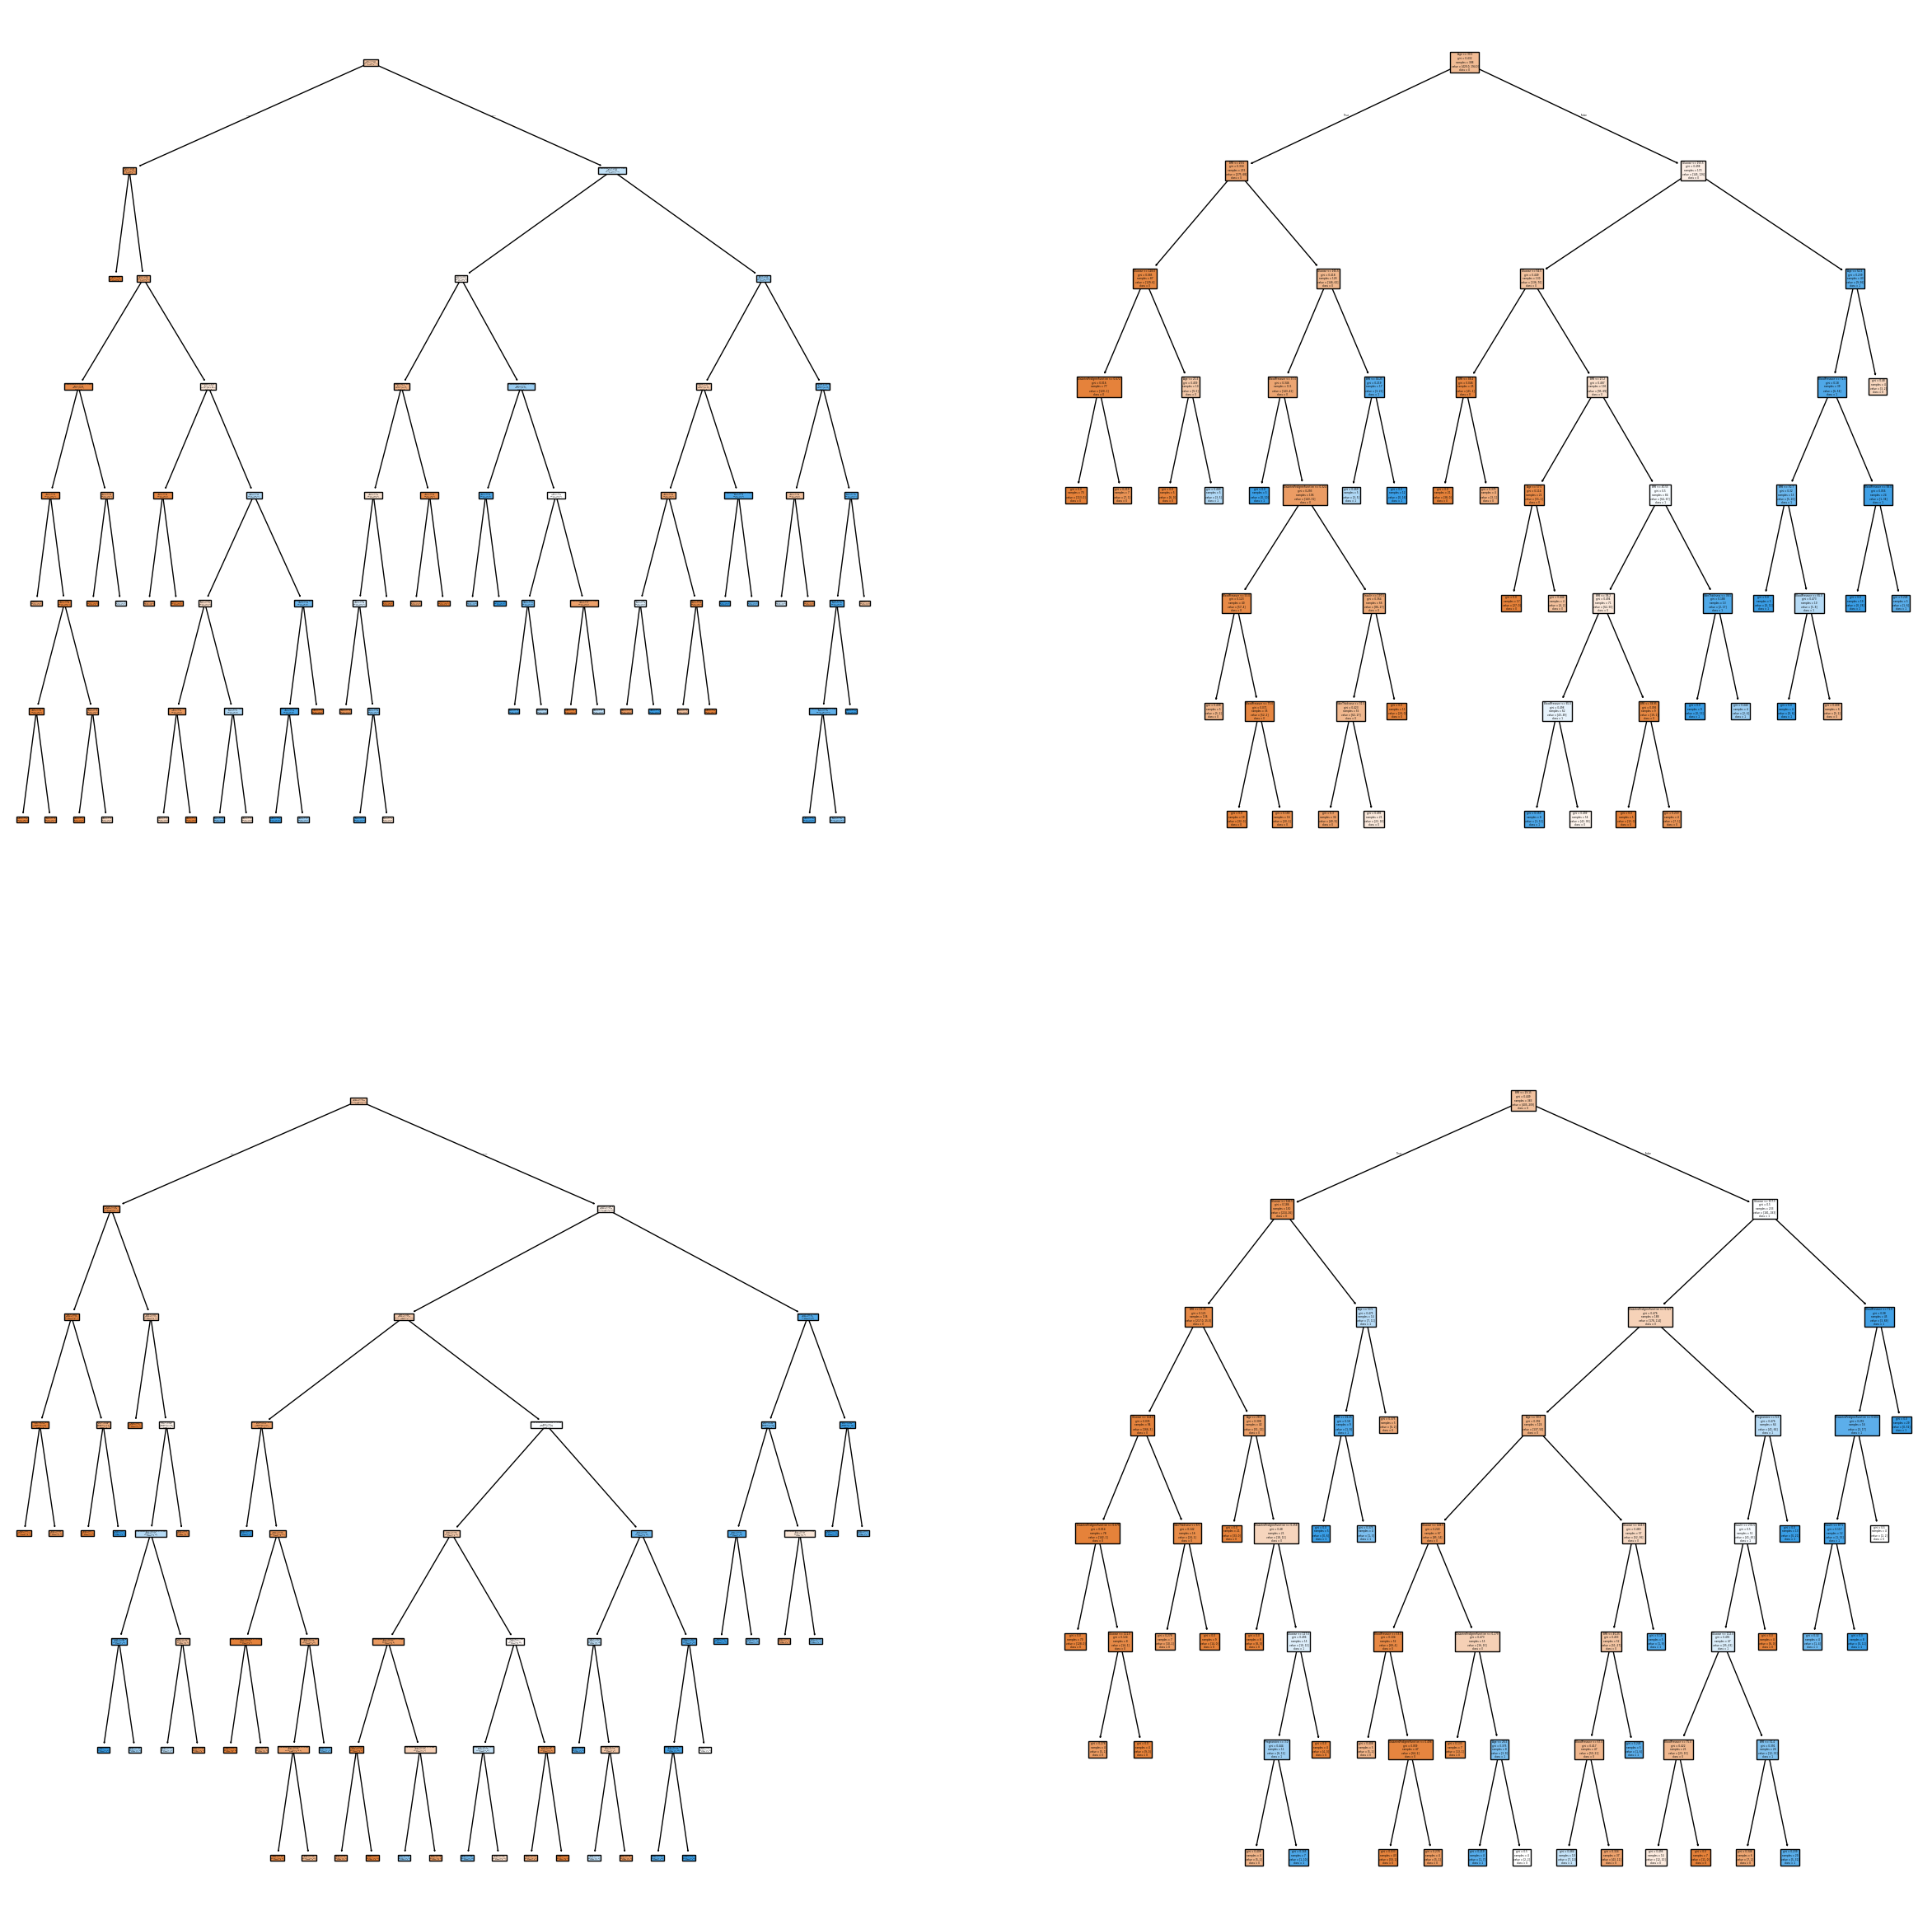

In [48]:
fig, axis = plt.subplots(2, 2, figsize = (30, 30))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(best.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()